In [25]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
path = "../../data/raw/btsdelay/"
file_list = glob.glob(f"{path}*.parquet")

df = pd.concat([pd.read_parquet(i) for i in file_list])

# Sampling dataframe to reduce compute time for iteration
# df = df.sample(n=100_000)

---
Kalebs -> Focus on Airports now instead of individual flights

In [8]:
df.groupby("Origin").Origin.count().sort_values(ascending=False)

Origin
ORD    2750374
ATL    2743592
DEN    2341170
DFW    2208532
CLT    1815682
        ...   
CDB        524
BFM        410
ILG        330
ROP        302
YNG          4
Name: Origin, Length: 388, dtype: int64

In [14]:

port_dest_df = df.groupby(["Origin", "Dest"]).agg({
    "DepDelay": "mean",
    "ArrDelay": "mean",
    "Dest": "count"
}).dropna().sort_values("ArrDelay", ascending=False) \
  .rename(columns={
    "Dest": "flight_count",
    "DepDelay": "avg_dep_delay",
    "ArrDelay": "avg_arr_delay",
})
port_dest_df

,,avg_dep_delay,avg_arr_delay,flight_count
Origin,Dest,,,
RDM,MFR,814.0,1347.0,2
MDT,HPN,759.0,798.0,1
VPS,SRQ,720.0,744.0,1
DAB,DTW,248.0,227.0,1
ICT,DAY,181.0,210.0,1
...,...,...,...,...
BHM,CAE,-7.0,-54.0,1
CAE,BHM,-10.0,-55.0,1
DEN,SBN,-17.0,-57.0,1


In [15]:
port_dest_df.sort_values("flight_count", ascending=False).head(10)

avg_dep_delay  avg_arr_delay  flight_count
Origin Dest                                            
SFO    LAX        7.918641       1.102596         56204
LAX    SFO        9.308275       2.850463         56194
       LAS        7.811482       2.733496         44668
LAS    LAX        8.804042       2.988827         44575
ORD    LGA       15.505013      10.702464         44364
LGA    ORD       14.220532       6.399252         44338
HNL    OGG        0.552596      -0.168819         40725
OGG    HNL        0.779352       0.070391         40722
LAX    JFK       10.453907      -0.147342         40381
JFK    LAX        8.271107      -3.033413         40315

In [16]:
port_dest_df['network_impact'] = (port_dest_df.avg_arr_delay + port_dest_df.avg_dep_delay) * port_dest_df.flight_count / sum(port_dest_df.flight_count)
port_dest_df.sort_values("network_impact", ascending=False).head(10)

avg_dep_delay  avg_arr_delay  flight_count  network_impact
Origin Dest                                                            
ORD    LGA       15.505013      10.702464         44364        0.039826
MCO    EWR       20.861615      17.250739         28318        0.036969
LGA    ORD       14.220532       6.399252         44338        0.031316
EWR    MCO       17.102543      11.687791         28328        0.027937
FLL    EWR       19.590985      15.237009         22277        0.026576
LAX    SFO        9.308275       2.850463         56194        0.023404
ATL    EWR       16.993806      11.063902         23911        0.022981
EWR    FLL       17.754029      11.450405         22277        0.022285
       BOS       18.328279      13.316285         18780        0.020357
IAH    DFW       14.691591      11.735064         22475        0.020345

Jordan Addition

In [50]:
pd.set_option('display.max_columns', 200)
df.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings,Season
0,2018-01-23,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,1256.0,0.0,38.0,62.0,59.0,145.0,2018,1,1,23,2,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N8928A,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1200-1259,14.0,1211.0,1249.0,7.0,1304,-8.0,0.0,-1.0,1300-1359,1,0.0,Winter
1,2018-01-24,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,1258.0,0.0,36.0,62.0,61.0,145.0,2018,1,1,24,3,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N800AY,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1200-1259,13.0,1210.0,1246.0,12.0,1304,-6.0,0.0,-1.0,1300-1359,1,0.0,Winter
2,2018-01-25,Endeavor Air Inc.,ABY,ATL,False,False,1202,1153.0,0.0,-9.0,1302.0,0.0,40.0,62.0,69.0,145.0,2018,1,1,25,4,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N8836A,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1200-1259,18.0,1211.0,1251.0,11.0,1304,-2.0,0.0,-1.0,1300-1359,1,0.0,Winter
3,2018-01-26,Endeavor Air Inc.,ABY,ATL,False,False,1202,1150.0,0.0,-12.0,1253.0,0.0,35.0,62.0,63.0,145.0,2018,1,1,26,5,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N800AY,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1200-1259,17.0,1207.0,1242.0,11.0,1304,-11.0,0.0,-1.0,1300-1359,1,0.0,Winter
4,2018-01-27,Endeavor Air Inc.,ABY,ATL,False,False,1400,1355.0,0.0,-5.0,1459.0,0.0,36.0,60.0,64.0,145.0,2018,1,1,27,6,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N8839E,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1400-1459,17.0,1412.0,1448.0,11.0,1500,-1.0,0.0,-1.0,1500-1559,1,0.0,Winter


In [26]:
df['Season'] = np.where(df['Month'].isin([12,1,2]), 'Winter'
                        , np.where(df['Month'].isin([3,4,5]),'Spring'
                           , np.where(df['Month'].isin([6,7,8]),'Summer','Fall')))

Data is from Jan 2018 to July 2022

In [ ]:
df.groupby(['Year','Month'])['Year'].count()
#df.Year.value_counts()

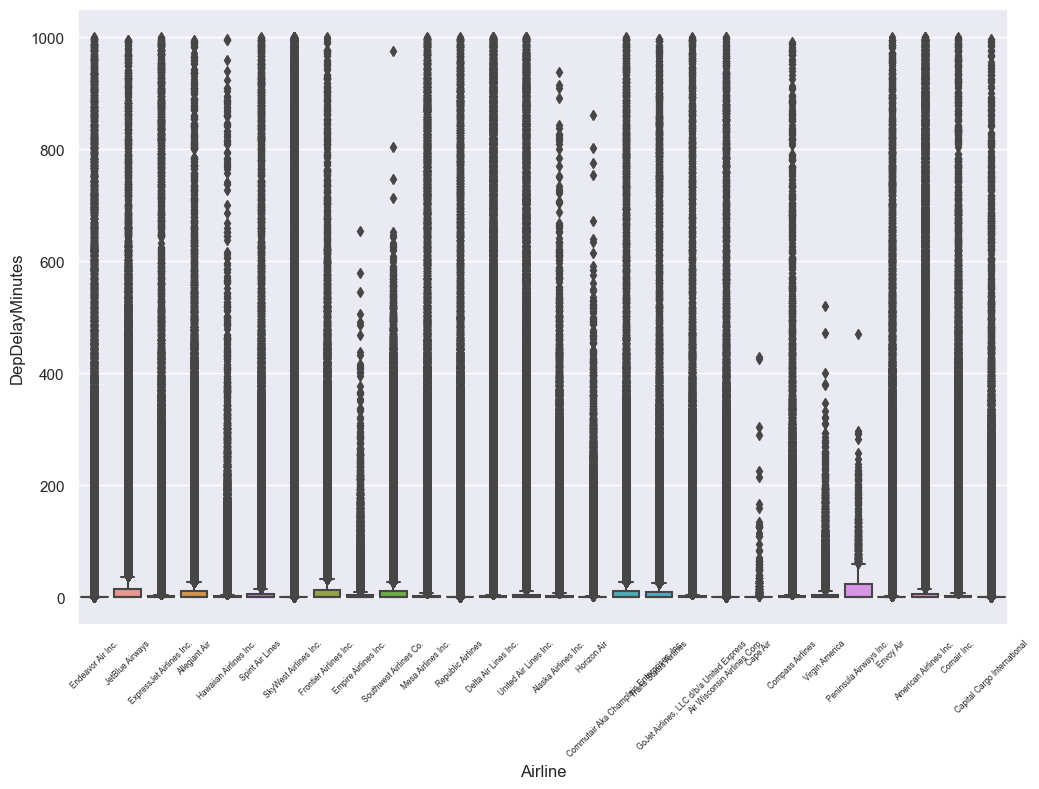

In [9]:
#DepDelayMinutes
import numpy as np
import matplotlib as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(12,8)})
g = sns.boxplot(x='Airline', y='DepDelayMinutes', data=df[df['DepDelayMinutes'] <= 1000])
g.set_xticklabels(g.get_xticklabels(), rotation=45, fontsize = 6);
#df.groupby("Origin")['FlightDate'].count()

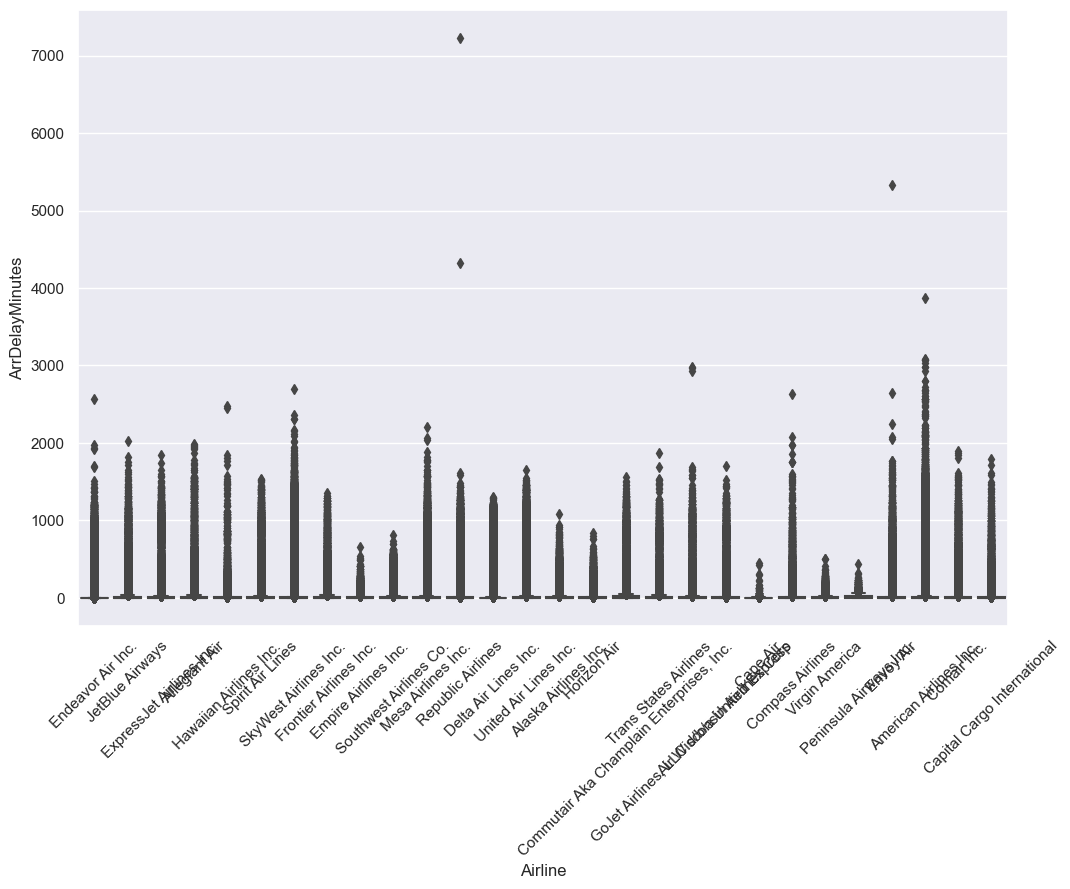

In [4]:
s = sns.boxplot(x='Airline', y='ArrDelayMinutes', data=df)
s.set_xticklabels(s.get_xticklabels(), rotation=45);

In [7]:
reg_data = df.copy()

,Origin,Month,Airline,DepDelayMinutes
0,ABY,1,Endeavor Air Inc.,0.0
1,ABY,1,Endeavor Air Inc.,0.0
2,ABY,1,Endeavor Air Inc.,0.0
3,ABY,1,Endeavor Air Inc.,0.0
4,ABY,1,Endeavor Air Inc.,0.0
5,ABY,1,Endeavor Air Inc.,NaN
6,ABY,1,Endeavor Air Inc.,2.0
7,ABY,1,Endeavor Air Inc.,0.0
8,ABY,1,Endeavor Air Inc.,0.0
9,ATL,1,Endeavor Air Inc.,24.0


In [9]:
reg_data = df[['Origin', 'Month','Airline','DepDelayMinutes','Year']].copy()
reg_data = reg_data[(reg_data['Year']==2018)&(reg_data['DepDelayMinutes']<1000)]
reg_data['Delay_Ind'] = np.where(reg_data['DepDelayMinutes']> 5,1,0)
reg_data = reg_data.sample(n=100000, random_state=1234)
feature_cols = ['Origin', 'Month','Airline']
X = pd.get_dummies(reg_data[feature_cols])
y = reg_data.Delay_Ind 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

In [3]:
#conda install sklearn
#from sklearn.ensemble import RandomForestClassifier

Random Forest Classifier - Initial Model

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=25,n_estimators=10,random_state=1234)
# Train the model on training data
model = rf.fit(X_train, y_train);
#predict_proba

In [37]:
#model
predictions = model.predict_proba(X_test)
#print(X_test, predictions)

#Run this to see predictions and features
final_model = pd.concat([X_test.reset_index(drop=True),
               pd.DataFrame(predictions).reset_index(drop=True)], axis=1)

final_model = final_model.drop_duplicates()
#final_model

# def undummy(d):
#     return d.dot(d.columns)

# final_model = final_model.assign(Airport_Dest=final_model.filter(regex='^Origin_').pipe(undummy))
# #final_model
# final_model[['Month',0,1,'Airport_Dest']]

In [31]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=model,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(X_train, y_train)
grid_search.best_score_

Fitting 4 folds for each of 180 candidates, totalling 720 fits


0.7324400000000001

In [32]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=10,
                       random_state=1234)

Updated Model with Hyperparameter Tuning

In [33]:
rf_final = RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=10)
# Train the model on training data
model_final = rf_final.fit(X_train, y_train);
#predict_proba

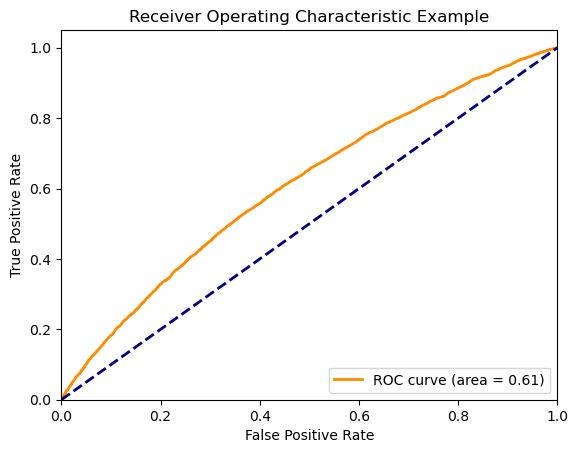

In [39]:
from sklearn.metrics import roc_curve, auc
# Compute the false positive rate, true positive rate, and threshold
fpr, tpr, thresholds = roc_curve(y_test, predictions[:,1])

# Compute the area under the curve (AUC) score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()